In [1]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd

# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv('../../input/sample-data/train_preprocessed.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv('../../input/sample-data/test_preprocessed.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()


# 学習データとテストデータを返す関数
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

## BOX-COX変換
- 対数変換を一般化した変換である。
- 正値の列のみに適用できる

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
%matplotlib inline

In [3]:
train_x, test_x = load_data()

In [4]:
num_cols = ['age', 'height', 'weight', 'amount',
            'medical_info_a1', 'medical_info_a2', 'medical_info_a3', 'medical_info_b1']

pos_cols = np.array(num_cols)[np.where(pd.concat([train_x, test_x])[num_cols].min(axis=0) > 0)[0]].tolist()

#### 変換前

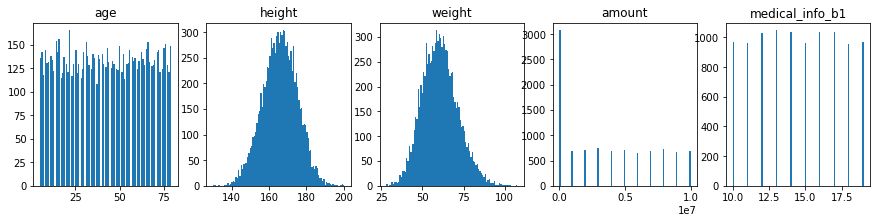

In [5]:
display(Markdown('#### 変換前'))
fig = plt.figure(figsize=(len(pos_cols) * 3, 3))
for i, c in enumerate(pos_cols, start=1):
    ax = fig.add_subplot(1, len(pos_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

#### 変換後

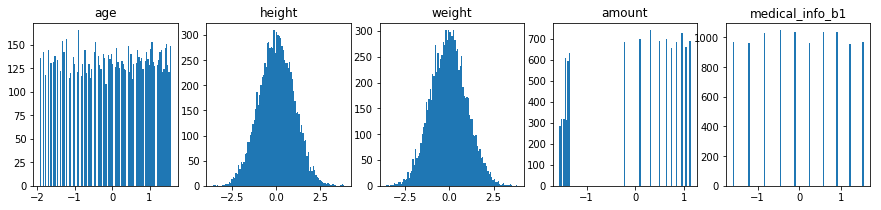

In [6]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
pt.fit(train_x[pos_cols])

# 変換後のデータで各列を置換
train_x[pos_cols] = pt.transform(train_x[pos_cols])
test_x[pos_cols] = pt.transform(test_x[pos_cols])

display(Markdown('#### 変換後'))
fig = plt.figure(figsize=(len(pos_cols) * 3, 3))
for i, c in enumerate(pos_cols, start=1):
    ax = fig.add_subplot(1, len(pos_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

例があまり良くないので違いがわかりにくいが、上手く行く場合もある

## Yeo-Johnson 変換
- BOX-COX変換をより一般化したもの
- 正値でなくても良い

In [7]:
train_x, test_x = load_data()
num_cols = ['age', 'height', 'weight', 'amount',
            'medical_info_a1', 'medical_info_a2', 'medical_info_a3', 'medical_info_b1']

#### 変換前

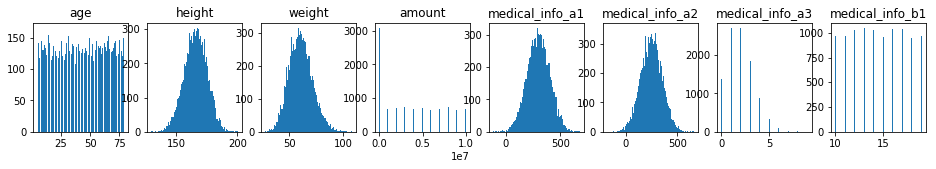

In [8]:
display(Markdown('#### 変換前'))
fig = plt.figure(figsize=(len(num_cols) * 2, 2))
for i, c in enumerate(num_cols, start=1):
    ax = fig.add_subplot(1, len(num_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

#### 変換後

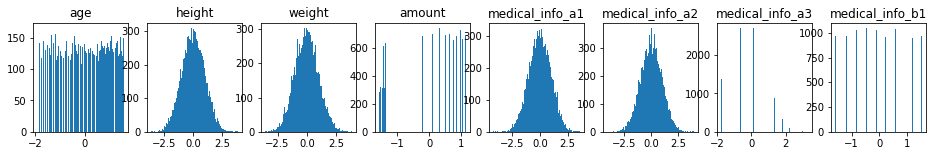

In [9]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[num_cols])

# 変換後のデータで各列を置換
train_x[num_cols] = pt.transform(train_x[num_cols])
test_x[num_cols] = pt.transform(test_x[num_cols])

display(Markdown('#### 変換後'))
fig = plt.figure(figsize=(len(num_cols) * 2, 2))
for i, c in enumerate(num_cols, start=1):
    ax = fig.add_subplot(1, len(num_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

## RankGauss
- 数値変数のうち「順位」を表すものについては、正確には数値ではないためニューラルネットなどのモデルのインプットとして使用することができない
  - ⇒無理やり正規化する

In [10]:
train_x, test_x = load_data()
num_cols = ['age', 'height', 'weight', 'amount',
            'medical_info_a1', 'medical_info_a2', 'medical_info_a3', 'medical_info_b1']

#### 変換前

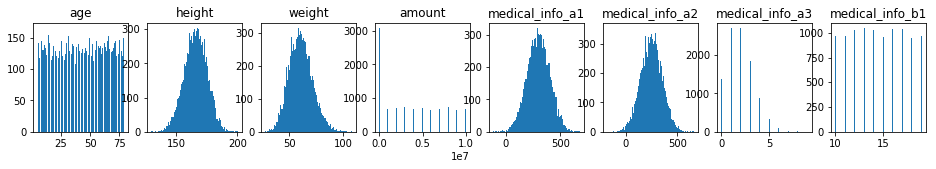

In [11]:
display(Markdown('#### 変換前'))
fig = plt.figure(figsize=(len(num_cols) * 2, 2))
for i, c in enumerate(num_cols, start=1):
    ax = fig.add_subplot(1, len(num_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

#### 変換後

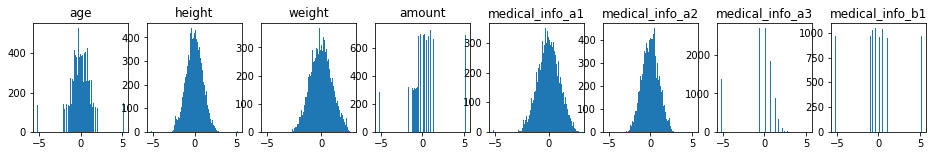

In [12]:
from sklearn.preprocessing import QuantileTransformer

# 学習データに基づいて複数列のRankGaussによる変換を定義
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

# 変換後のデータで各列を置換
train_x[num_cols] = transformer.transform(train_x[num_cols])
test_x[num_cols] = transformer.transform(test_x[num_cols])

display(Markdown('#### 変換後'))
fig = plt.figure(figsize=(len(num_cols) * 2, 2))
for i, c in enumerate(num_cols, start=1):
    ax = fig.add_subplot(1, len(num_cols), i)
    ax.hist(test_x[c], bins=100)
    ax.set_title(c)

確かに正規分布の形状に近くなった。